## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [1]:
import pandas as pd

In [52]:
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [90]:
df = pd.read_csv('QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

In [89]:
# df.columns = ["DATE", "TAG", 'POSTS']

In [88]:
# df.to_csv('QueryResults.csv', index=False)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [18]:
print(df.head())
print(df.tail())

                  DATE   TAG  POSTS
0  2008-07-01 00:00:00    c#      3
1  2008-08-01 00:00:00   php    157
2  2008-08-01 00:00:00  ruby     70
3  2008-08-01 00:00:00     c     83
4  2008-08-01 00:00:00   c++    164
                     DATE         TAG  POSTS
2588  2024-02-01 00:00:00        perl     36
2589  2024-02-01 00:00:00      delphi    111
2590  2024-02-01 00:00:00          go    309
2591  2024-02-01 00:00:00         php   1311
2592  2024-02-01 00:00:00  javascript   4790


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [19]:
df.shape

(2593, 3)

2593 Rows and 3 Columns

**Challenge**: Count the number of entries in each column of the dataframe

In [20]:
df.count()

DATE     2593
TAG      2593
POSTS    2593
dtype: int64

Note that .count() will actually tell us the number of non-NAN values in each column.

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [24]:
df[["TAG", 'POSTS']].groupby('TAG').sum()

,POSTS
TAG,
assembly,44031
c,402954
c#,1611568
c++,804710
delphi,51725
go,72371
java,1913116
javascript,2522340
perl,68041


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [25]:
df[["TAG", 'POSTS']].groupby('TAG').count()

,POSTS
TAG,
assembly,187
c,187
c#,188
c++,187
delphi,187
go,172
java,187
javascript,187
perl,187


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [27]:
df['DATE'][1]
df.DATE[1]

'2008-08-01 00:00:00'

In [29]:
type(df['DATE'][1])

str

In [31]:
print(pd.to_datetime(df['DATE'][1]))
type(pd.to_datetime(df['DATE'][1]))

2008-08-01 00:00:00


pandas._libs.tslibs.timestamps.Timestamp

In [33]:
# Conver the entire DATE column 
df.DATE = pd.to_datetime(df.DATE)
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,php,157
2,2008-08-01,ruby,70
3,2008-08-01,c,83
4,2008-08-01,c++,164


## Data Manipulation



In [96]:
reshaped_df = df.pivot_table(index= 'DATE', columns= 'TAG', values= 'POSTS', fill_value=0)

In [44]:
df_filled = reshaped_df.fillna(0)

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [46]:
df_filled.shape

(188, 14)

In [47]:
print(df_filled.head())

TAG         assembly      c      c#    c++  delphi   go    java  javascript  \
DATE                                                                          
2008-07-01       0.0    0.0     3.0    0.0     0.0  0.0     0.0         0.0   
2008-08-01       8.0   83.0   504.0  164.0    14.0  0.0   222.0       163.0   
2008-09-01      28.0  320.0  1639.0  755.0   104.0  0.0  1129.0       634.0   
2008-10-01      16.0  303.0  1987.0  807.0   112.0  0.0  1149.0       722.0   
2008-11-01      16.0  258.0  1729.0  734.0   140.0  0.0   954.0       580.0   

TAG          perl    php  python    r   ruby  swift  
DATE                                                 
2008-07-01    0.0    0.0     0.0  0.0    0.0    0.0  
2008-08-01   28.0  157.0   119.0  0.0   70.0    0.0  
2008-09-01  130.0  474.0   537.0  6.0  286.0    0.0  
2008-10-01  128.0  604.0   506.0  0.0  247.0    0.0  
2008-11-01   97.0  497.0   448.0  1.0  157.0    0.0  


In [48]:
print(df_filled.tail())

TAG         assembly      c      c#     c++  delphi     go    java  \
DATE                                                                 
2023-10-01     172.0  969.0  3182.0  1706.0   165.0  421.0  3413.0   
2023-11-01     172.0  958.0  3108.0  1469.0   103.0  409.0  3274.0   
2023-12-01     181.0  876.0  2645.0  1429.0    75.0  326.0  2538.0   
2024-01-01     176.0  825.0  2687.0  1581.0    89.0  345.0  2864.0   
2024-02-01     134.0  775.0  2728.0  1461.0   111.0  309.0  2826.0   

TAG         javascript  perl     php  python       r   ruby  swift  
DATE                                                                
2023-10-01      5443.0  53.0  1529.0  8986.0  2063.0  193.0  899.0  
2023-11-01      5185.0  44.0  1397.0  8452.0  1991.0  153.0  864.0  
2023-12-01      4767.0  53.0  1208.0  6999.0  1603.0  154.0  742.0  
2024-01-01      5134.0  34.0  1400.0  7763.0  1808.0  163.0  867.0  
2024-02-01      4790.0  36.0  1311.0  7888.0  1827.0  157.0  676.0  


In [49]:
df_filled.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [50]:
df_filled.count()

TAG
assembly      188
c             188
c#            188
c++           188
delphi        188
go            188
java          188
javascript    188
perl          188
php           188
python        188
r             188
ruby          188
swift         188
dtype: int64

In [51]:
df_filled.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

**Mini Challenge**
Plot the popularity of the Java Programming Language

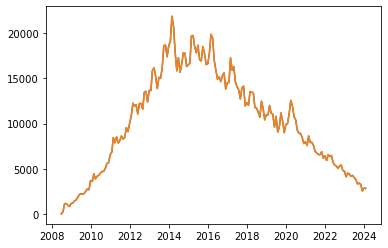

In [57]:
plt.plot(df_filled.index, df_filled['java'])
plt.plot(df_filled.index, df_filled.java)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

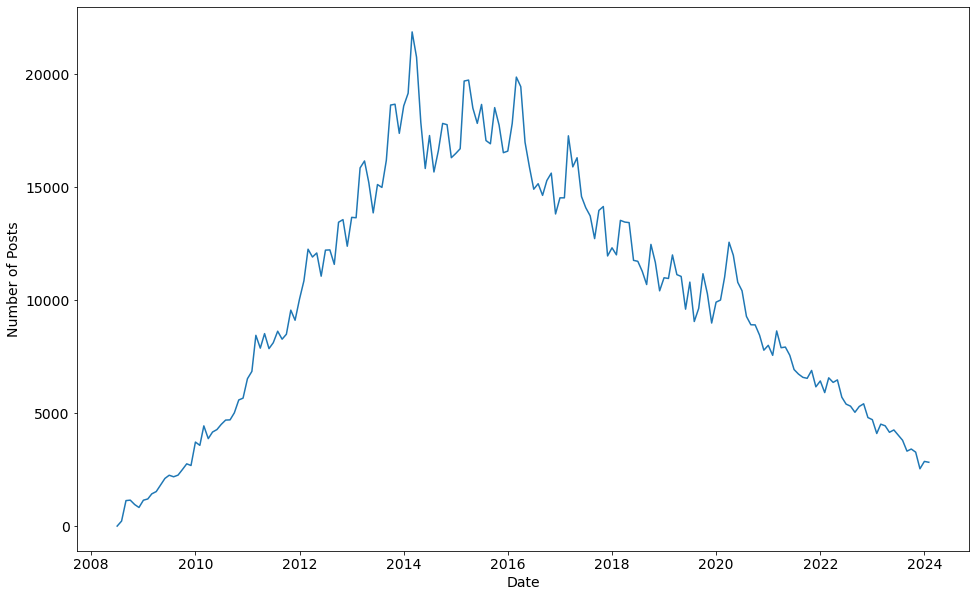

In [62]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.plot(df_filled.index, df_filled.java)

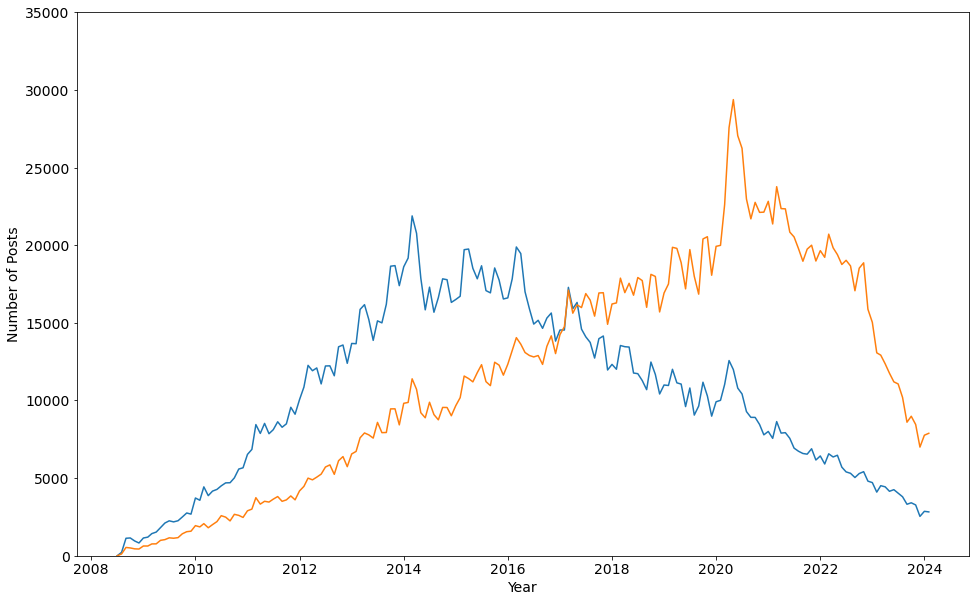

In [68]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.ylim(0, 35000)

plt.plot(df_filled.index, df_filled.java, df_filled.python)

**Using for loop to plot multiple programming languages**

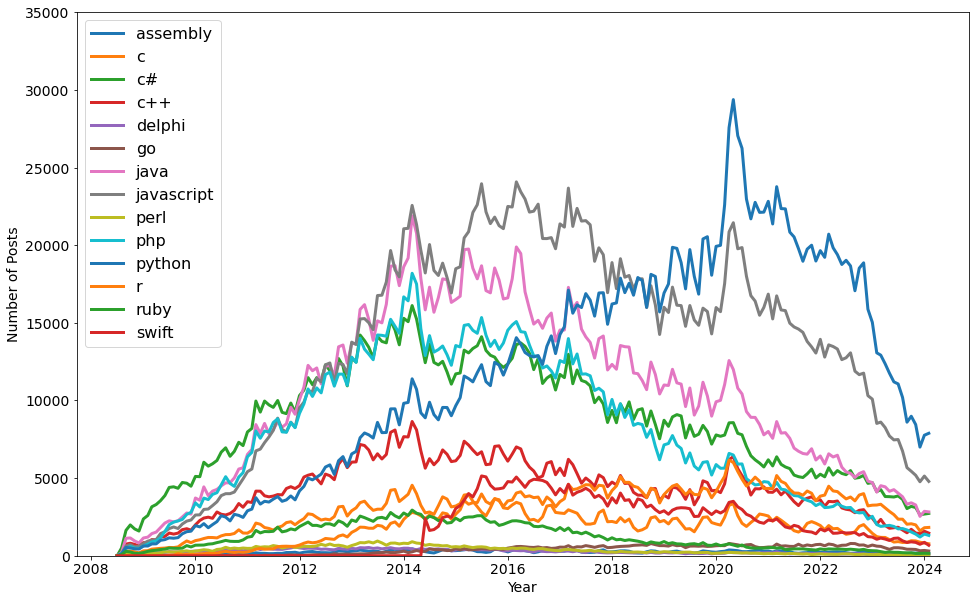

In [73]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.ylim(0, 35000)

# plotting all of the programming languages using for loop
for column in df_filled.columns:
    plt.plot(df_filled.index, df_filled[column], linewidth=3, label=df_filled[column].name)
    
plt.legend(fontsize=16)    

**Can also be done with a one liner:**

Text(0, 0.5, 'Number of Posts')

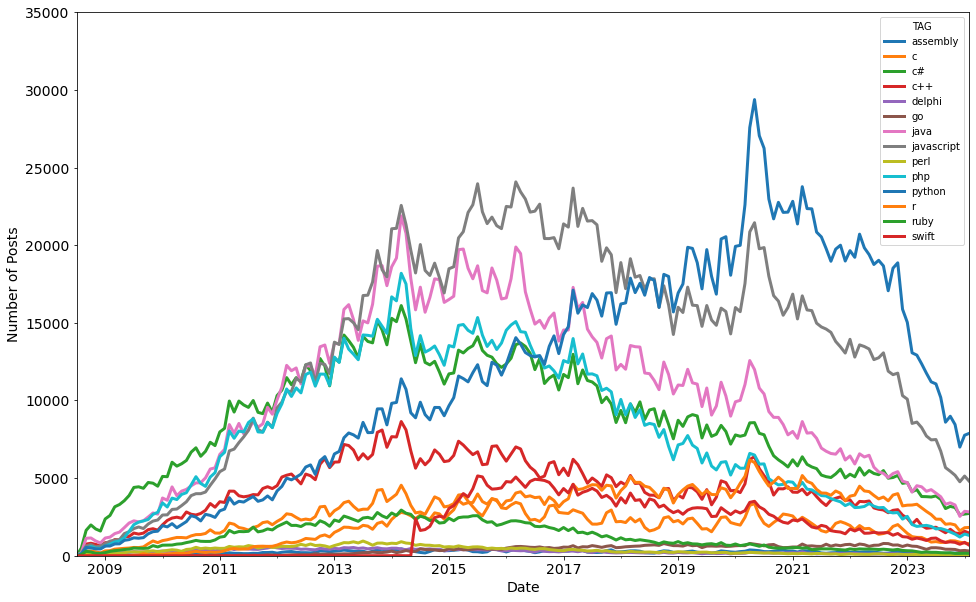

In [76]:
df_filled.plot(kind="line", figsize=(16, 10), fontsize=14, ylim=(0, 35000), linewidth=3)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

**The window is number of observations that are averaged**

In [84]:
roll_df = df_filled.rolling(window=6).mean()

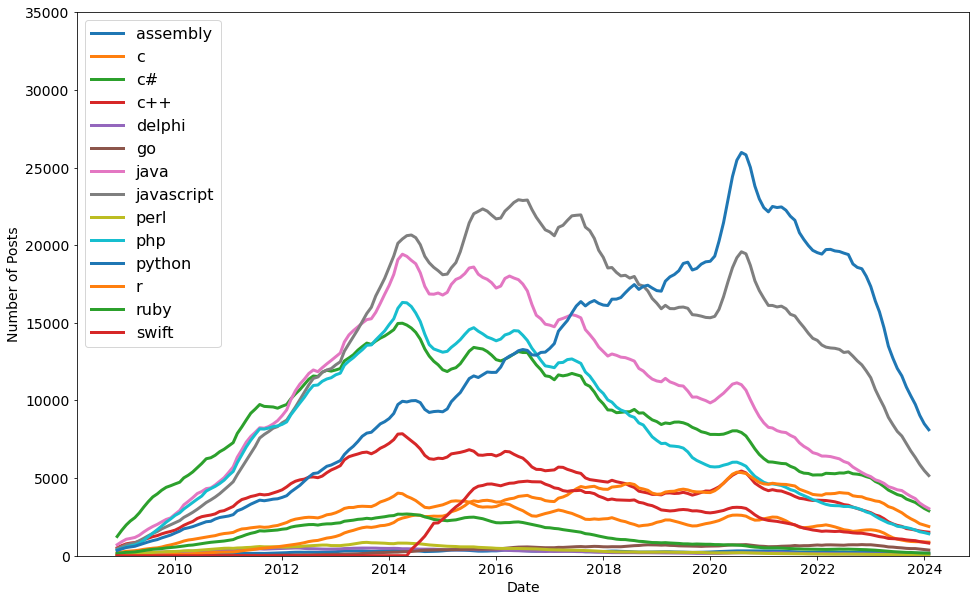

In [91]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

# Plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], linewidth=3, label=roll_df[column].name)
    
plt.legend(fontsize=16)

## QUIZ

**Question 1. Looking at the data, what was the most popular programming language from 2008 to 2012 by the number of posts**

In [98]:
# Convert the 'DATE' column into datetime
df['DATE'] = pd.to_datetime(df['DATE'])

In [114]:
# Filter data for the years 2008 to 2012
filtered_data = df[df['DATE'].dt.year.between(2008, 2012)]

In [115]:
# Group by 'TAG' (programming language) and sum the number of posts for each language
language_posts = filtered_data.groupby('TAG')['POSTS'].sum()

In [116]:
# Find the programming language with the highest total number of posts
most_popular_language = language_posts.idxmax()

In [117]:
most_popular_language

'c#'

 **Question 2. What was the most popular programming language from 2015 to 2018**

In [121]:
# Filter data for the years 2015 to 2018
filtered_data = df[df['DATE'].dt.year.between(2015, 2018)]

# Group by 'TAG' (programming language) and sum the number of posts for each language
language_posts = filtered_data.groupby("TAG")['POSTS'].sum()

# Find the programming language with the highest total number of posts
most_popular_language = language_posts.idxmax()

most_popular_language

'javascript'

**Question 3.What was the most populat programming language in 2020?**

In [122]:
# Filter data for the year 2020
filtered_data = df[df['DATE'].dt.year == 2020]

# Group by 'TAG' (programming language) and sum the number of posts for each language
language_posts = filtered_data.groupby('TAG')['POSTS'].sum()

# Find the programming language with the highest total number of posts
most_popular_language = language_posts.idxmax()

most_popular_language

'python'